In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/train3.csv',encoding='ISO-8859-1')

In [ ]:
df.head()  

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
df.tail() 

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [ ]:
df.shape                                           #rows and columns of dataset

(99989, 3)

In [ ]:
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))

In [ ]:
print(count)

[56457, 43532]


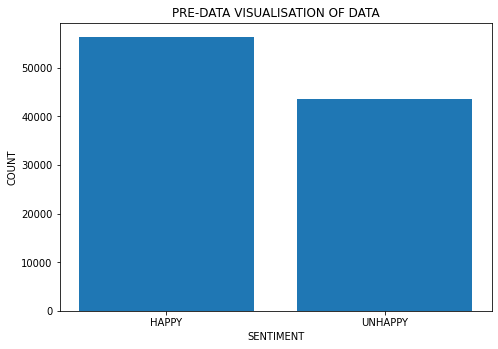

In [ ]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [ ]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1

In [ ]:
df[['Preprocessed_1']]

,Preprocessed_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [ ]:
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2

In [ ]:
df[['Preprocessed_2']]

,Preprocessed_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [ ]:
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3

In [ ]:
df[['Preprocessed_3']]

,Preprocessed_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4

In [ ]:
df[['Preprocessed_4']]

,Preprocessed_4
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweets time se...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5

In [ ]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
#removing empty rows
df=df[df['Preprocessed_5']!='']

In [ ]:
df.shape

(99957, 8)

In [ ]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['Preprocessed_5']
df2['Sentiment']=df['Sentiment']

In [ ]:
df2

,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0
...,...,...
99984,cupcake seems like repeating problem hope able...,0
99985,cupcake arrrr replied different tweet time see...,1
99986,cupcake ya thought,0
99987,cupcake dollie yes yes glad fun,1


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df3 = pd.read_csv('/content/train2.csv',encoding='ISO-8859-1')

In [ ]:
df3

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
32036,32037,0,this is sad right now
32037,32038,0,this is very bad right now
32038,32039,1,this was good earlier
32039,32040,0,i was not happy and not good earlier


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32041 entries, 0 to 32040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32041 non-null  int64 
 1   label           32041 non-null  int64 
 2   tweet           32041 non-null  object
 3   Preprocessed_1  32041 non-null  object
dtypes: int64(2), object(2)
memory usage: 1001.4+ KB


In [ ]:
df3.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df3.tail()

,id,label,tweet
32036,32037,0,this is sad right now
32037,32038,0,this is very bad right now
32038,32039,1,this was good earlier
32039,32040,0,i was not happy and not good earlier
32040,32041,1,earlier i was good and not bad


In [ ]:
df3.shape  

(32041, 3)

In [ ]:
df3.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [ ]:
df3.nunique()

id       32041
label        2
tweet    29609
dtype: int64

In [ ]:
corr=df3.corr()
corr

,id,label
id,1.000000,0.009348
label,0.009348,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd82e246150>,
      dtype=object)

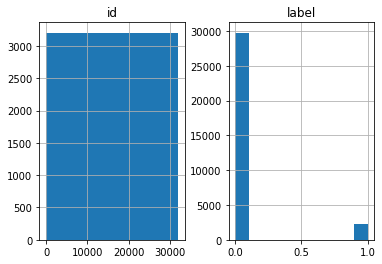

In [ ]:
df3.hist()

In [ ]:
count3=[]
count3.append(int(df3.label.value_counts()[1]))
count3.append(int(df3.label.value_counts()[0]))

In [ ]:
print(count3)

[2279, 29762]


In [ ]:
df3.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

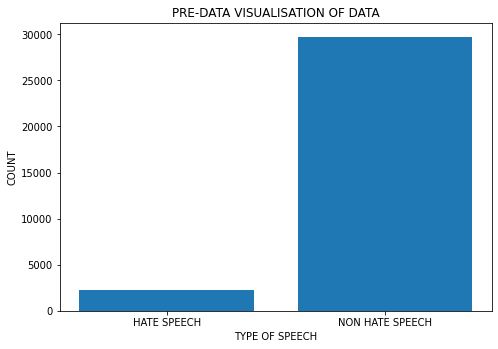

In [ ]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig3=plt.figure()
axes=fig3.add_axes([0,0,1,1])
label3=['HATE SPEECH','NON HATE SPEECH']
axes.bar(label3,count3)
plt.xlabel("TYPE OF SPEECH")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [ ]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
preprocess1_3=[]
for each_row in range(df3.shape[0]):
    text=df3['tweet'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1_3.append(regex)
df3["Preprocessed_1"]=preprocess1_3

In [ ]:
df3[['Preprocessed_1']]

,Preprocessed_1
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
32036,this is sad right now
32037,this is very bad right now
32038,this was good earlier
32039,i was not happy and not good earlier


In [ ]:
preprocess2_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2_3.append(regex_p1)
df3["Preprocessed_2"]=preprocess2_3

In [ ]:
df3[['Preprocessed_2']]

,Preprocessed_2
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
32036,this is sad right now
32037,this is very bad right now
32038,this was good earlier
32039,i was not happy and not good earlier


In [ ]:
preprocess3_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3_3.append(regex_p2)
df3["Preprocessed_3"]=preprocess3_3

In [ ]:
df3[['Preprocessed_3']]

,Preprocessed_3
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
32036,this is sad right now
32037,this is very bad right now
32038,this was good earlier
32039,i was not happy and not good earlier


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [ ]:
preprocess4_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4_3.append(dre)
df3['Preprocessed_4']=preprocess4_3

In [ ]:
df3[['Preprocessed_4']]

,Preprocessed_4
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
32036,sad right
32037,bad right
32038,good earlier
32039,happy good earlier


In [ ]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [ ]:
preprocess5_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess5_3.append(dre)
df3['Preprocessed_5']=preprocess5_3

In [ ]:
df3[['Preprocessed_5']]

,Preprocessed_5
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
32036,sad right
32037,bad right
32038,good earlier
32039,happy good earlier


In [ ]:
#removing empty rows
df3=df3[df3['Preprocessed_5']!='']

In [ ]:
df3.shape

(32028, 8)

In [ ]:
df3[['Preprocessed_5']]

,Preprocessed_5
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
32036,sad right
32037,bad right
32038,good earlier
32039,happy good earlier


In [ ]:
per=list()
per=df3['Preprocessed_5'].to_list()
df_3 = pd.DataFrame()
df_3['Clean Tweets']=per
df_3['Sentiment']=df3['label'].to_list()

In [ ]:
df_3

,Clean Tweets,Sentiment
0,user father dysfunctional selfish drag kid dys...,0
1,user user thanks lyft credit use cause offer w...,0
2,bihday majesty,0
3,model love u take u time ur,0
4,factsguide society motivation,0
...,...,...
32023,sad right,0
32024,bad right,0
32025,good earlier,1
32026,happy good earlier,0


In [ ]:
df2.head()

,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0


In [ ]:
df2.shape

(99957, 2)

In [ ]:
df_3.shape

(32028, 2)

In [ ]:
combined_df=df2.append(df_3)

In [ ]:
combined_df.shape

(131985, 2)

In [ ]:
df2.shape[0]+df_3.shape[0]

131985

In [ ]:
count3=[]
count3.append(int(combined_df.Sentiment.value_counts()[1]))
count3.append(int(combined_df.Sentiment.value_counts()[0]))

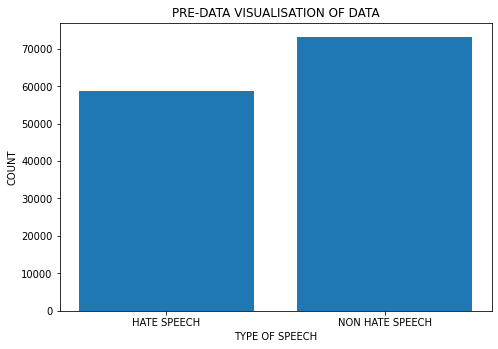

In [ ]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig3=plt.figure()
axes=fig3.add_axes([0,0,1,1])
label3=['HATE SPEECH','NON HATE SPEECH']
axes.bar(label3,count3)
plt.xlabel("TYPE OF SPEECH")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [ ]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()        #Loading tfidf function to our variable
comp_transformed_matrix=tf_idf.fit_transform(combined_df['Clean Tweets'])

In [ ]:
print(comp_transformed_matrix.shape)

(131985, 113711)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(comp_transformed_matrix,combined_df['Sentiment'],train_size=0.7577896381)

In [ ]:
x_train.shape

(100016, 113711)

In [ ]:
x_test.shape

(31969, 113711)

In [ ]:
y_train.shape

(100016,)

In [ ]:
y_test.shape

(31969,)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1=rfc.predict(x_test)

In [ ]:
rf1=accuracy_score(y_pred1,y_test)
rf2=precision_score(y_pred1,y_test,average='weighted')
rf3=recall_score(y_pred1,y_test,average='weighted')
rf4=f1_score(y_pred1,y_test,average='weighted')

In [ ]:
print(rf1,rf2,rf3,rf4)

0.7484115308773358 0.7526326962886485 0.7484115308773358 0.7496323420764474


In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression(max_iter=250)

In [ ]:
lrc.fit(x_train,y_train)

LogisticRegression(max_iter=250)

In [ ]:
y_pred2=lrc.predict(x_test)

In [ ]:
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

In [ ]:
print(lrc1,lrc2,lrc3,lrc4)

0.7624964787630286 0.71733817470847 0.7437196843553174 0.7302907514039951


In [ ]:
#NAIVEBayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [ ]:
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred3=nb.predict(x_test)

In [ ]:
nb1=accuracy_score(y_pred3,y_test)
nb2=precision_score(y_pred3,y_test)
nb3=recall_score(y_pred3,y_test)
nb4=f1_score(y_pred3,y_test)

In [ ]:
print(nb1,nb2,nb3,nb4)

0.7315211611248397 0.541495366176573 0.7950685492121956 0.6442279792746113


In [ ]:
#SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss="log")

In [ ]:
sgd.fit(x_train,y_train)

SGDClassifier(loss='log')

In [ ]:
y_pred4=sgd.predict(x_test)

In [ ]:
sgd1=accuracy_score(y_pred4,y_test)
sgd2=precision_score(y_pred4,y_test)
sgd3=recall_score(y_pred4,y_test)
sgd4=f1_score(y_pred4,y_test)

In [ ]:
print(sgd1,sgd2,sgd3,sgd4)

0.7403048608720147 0.6235598072760282 0.7544778641432917 0.6828000152922736


In [ ]:
#SVM
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred5=svc.predict(x_test)

In [ ]:
svc1=accuracy_score(y_pred5,y_test)
svc2=precision_score(y_pred5,y_test)
svc3=recall_score(y_pred5,y_test)
svc4=f1_score(y_pred5,y_test)

In [ ]:
print(svc1,svc2,svc3,svc4)

0.7701023506213027 0.7366105718874381 0.7469905112590285 0.7417642302148156


In [ ]:
#GradientBoostingMachine
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6=gbc.predict(x_test)

In [ ]:
gbc1=accuracy_score(y_pred6,y_test)
gbc2=precision_score(y_pred6,y_test)
gbc3=recall_score(y_pred6,y_test)
gbc4=f1_score(y_pred6,y_test)

In [ ]:
print(gbc1,gbc2,gbc3,gbc4)

0.6725406115997371 0.4033237902381119 0.7508124268815807 0.5247569728354684


In [ ]:
#Voting Classifier(logistic regresion & stochastic gradient descent)
from sklearn.ensemble import VotingClassifier
one=LogisticRegression(max_iter=250)
two=SVC()
vc=VotingClassifier(estimators=[('logistic',one),('SVM',two)],voting='hard'])
vc.fit(x_train,y_train)
y_pred7=vc.predict(x_test)       
print(y_pred7)

[0 1 0 ... 0 1 0]


In [ ]:
vc1=accuracy_score(y_pred7,y_test)
vc2=precision_score(y_pred7,y_test)
vc3=recall_score(y_pred7,y_test)
vc4=f1_score(y_pred7,y_test)

In [ ]:
print(vc1,vc2,vc3,vc4)

0.7617452815424582 0.6993226729976957 0.7518204339013588 0.7246219521018739


Text(0.5, 1.0, 'Representation of measures')

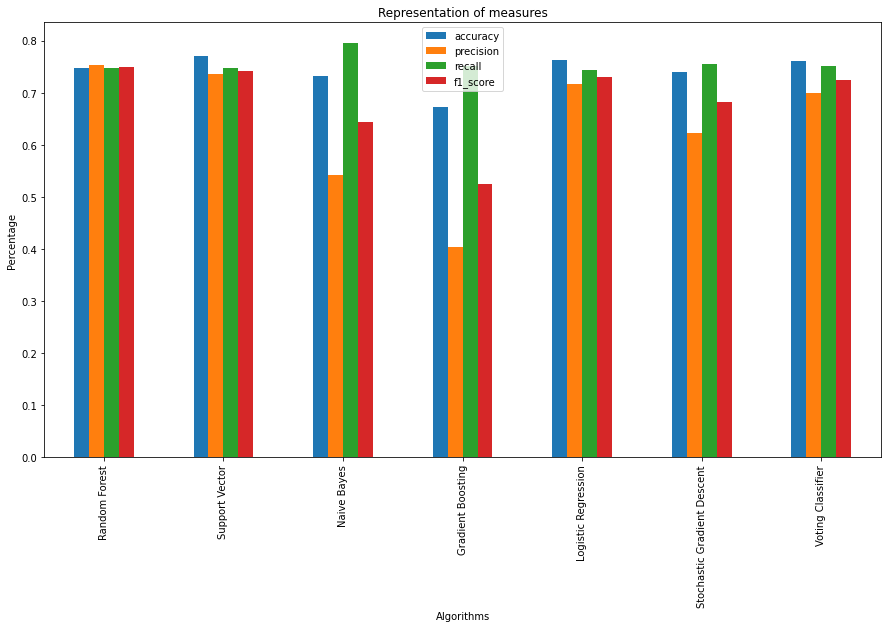

In [ ]:
graph=pd.DataFrame({"accuracy":[rf1,svc1,nb1,gbc1,lrc1,sgd1,vc1],
                    "precision":[rf2,svc2,nb2,gbc2,lrc2,sgd2,vc2],
                     "recall":[rf3,svc3,nb3,gbc3,lrc3,sgd3,vc3],
                     "f1_score":[rf4,svc4,nb4,gbc4,lrc4,sgd4,vc4]},
                  index=["Random Forest","Support Vector","Naive Bayes","Gradient Boosting","Logistic Regression","Stochastic Gradient Descent","Voting Classifier"])
graph.plot(kind='bar',figsize=(15,8))
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Representation of measures")

In [ ]:
from prettytable import PrettyTable

myTable = PrettyTable(["Models", "Accuracy", "Precision", "Recall","F1_Score"])

# Add rows
myTable.add_row(["RF", round(rf1*100,1),round(rf2*100,1),round(rf3*100,1),round(rf4*100,1)])
myTable.add_row(["SVM", round(svc1*100,1),round(svc2*100,1),round(svc3*100,1),round(svc4*100,1)])
myTable.add_row(["NB", round(nb1*100,1),round(nb2*100,1),round(nb3*100,1),round(nb4*100,1)])
myTable.add_row(["GB", round(gbc1*100,1),round(gbc2*100,1),round(gbc3*100,1),round(gbc4*100,1)])
myTable.add_row(["LR", round(lrc1*100,1),round(lrc2*100,1),round(lrc3*100,1),round(lrc4*100,1)])
myTable.add_row(["SGD", round(sgd1*100,1),round(sgd2*100,1),round(sgd3*100,1),round(sgd4*100,1)])
myTable.add_row(["VC", round(vc1*100,1),round(vc2*100,1),round(vc3*100,1),round(vc4*100,1)])

print(myTable)

+--------+----------+-----------+--------+----------+
| Models | Accuracy | Precision | Recall | F1_Score |
+--------+----------+-----------+--------+----------+
|   RF   |   74.8   |    75.3   |  74.8  |   75.0   |
|  SVM   |   77.0   |    73.7   |  74.7  |   74.2   |
|   NB   |   73.2   |    54.2   |  79.5  |   64.4   |
|   GB   |   67.3   |    40.3   |  75.1  |   52.5   |
|   LR   |   76.2   |    71.7   |  74.4  |   73.0   |
|  SGD   |   74.0   |    62.4   |  75.4  |   68.3   |
|   VC   |   76.2   |    69.9   |  75.2  |   72.5   |
+--------+----------+-----------+--------+----------+
